# HW2 YUSUF BESIROGLU 2016402387

In [22]:
library(ggplot2)
library(data.table)
library(caret)
library(rpart)
library(genlasso)
library(dplyr)
library(Metrics)

# Data Preprocessing

In [23]:
train_data <- fread('CBF_TRAIN.txt')


setnames(train_data <- train_data[order(V1)],'V1','class')

train_data[,id:=1:.N]
head(train_data)
long_train=melt(train_data,id.vars=c('id','class'))

long_train[,time:=as.numeric(variable)-1]

long_train=long_train[,list(id,class,time,value)]
long_train=long_train[order(id,time)]

x <- split(long_train, long_train$id, drop = FALSE)
head(x)

class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V121,V122,V123,V124,V125,V126,V127,V128,V129,id
1,-0.4642765,-0.5550479,-0.84284310,-0.8658955,-0.9363963,-0.8172700,-0.2636122,-1.2580483,-1.2503934,...,-1.0837000,-1.0179615,-0.9160287,-1.1342892,-0.9202237,-0.7893615,-0.6387058,-0.9636643,-1.2451691,1
1,-0.8969721,-0.6856855,-1.35138180,-1.4586668,-1.1653456,-1.4039293,-1.8217996,-0.8316011,-1.0163124,...,-1.5686762,-1.3640403,-1.1551774,-0.9958611,-1.1637529,-0.9165233,-0.5820981,-1.2590094,-1.3925241,2
1,-0.4646960,-0.5677389,-0.03202276,-0.6350456,-0.6028255,-0.2668563,-0.2670613,-0.9310423,-0.4493819,...,-0.6371576,-0.1552602,-0.6881293,-0.8856088,-0.7662393,-0.8653152,-0.2844857,-0.6878891,-0.8876084,3
1,-0.9658386,-1.6445832,-1.80593540,-1.4996576,-0.9200879,-1.1157058,-0.6501953,-0.9187663,-1.2347080,...,-1.0630339,-1.3165634,-0.7357389,-1.0521517,-0.9604649,-1.1335659,-0.6103437,-1.1652195,-0.6858989,4
1,-1.1864222,-0.8931970,-0.97773692,-0.6341093,-1.3848198,-1.2719261,-1.2121711,-1.4527917,-0.9344170,...,-1.2176250,-0.8236537,-1.2804516,-1.5893960,-0.9982938,-0.8107998,-0.9815906,-1.2784443,-1.1078289,5
1,-1.9453272,-1.4498402,-1.48894560,-1.8004841,-2.3130602,-1.7720853,-2.1548821,-1.3312254,-2.2651396,...,-0.1803694,0.5541209,0.6861262,0.6906180,0.6207642,0.9260082,-1.9410525,-2.1112366,-1.7680882,6


id,class,time,value
1,1,0,-0.4642765
1,1,1,-0.5550479
1,1,2,-0.8428431
1,1,3,-0.8658955
1,1,4,-0.9363963
1,1,5,-0.8172700
1,1,6,-0.2636122
1,1,7,-1.2580483
1,1,8,-1.2503934
1,1,9,-0.9183083


Read data from text file and split every time series into data frames.

# Fused Lasso

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 1"
[1] " min cv error: 0.743511254999998"
[1] "1se error: 5.15300235"
Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 2"
[1] " min cv error: 0.621295529999994"
[1] "1se error: 3.68318913770684"


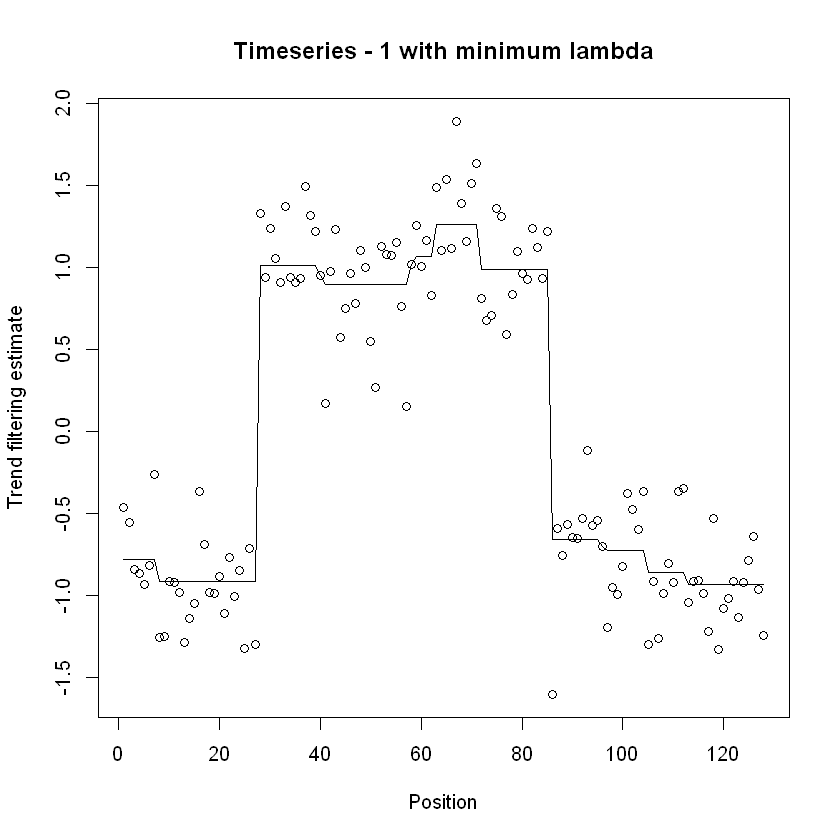

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 3"
[1] " min cv error: 0.662380755999999"
[1] "1se error: 1.76711718240919"


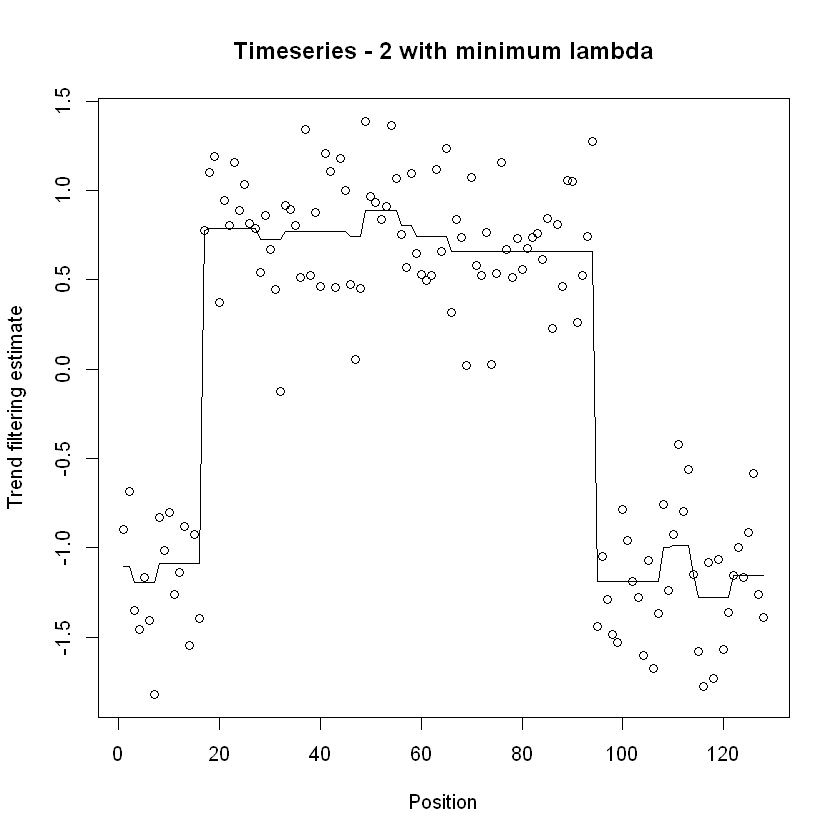

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 4"
[1] " min cv error: 1.41818841888889"
[1] "1se error: 2.70999707599999"


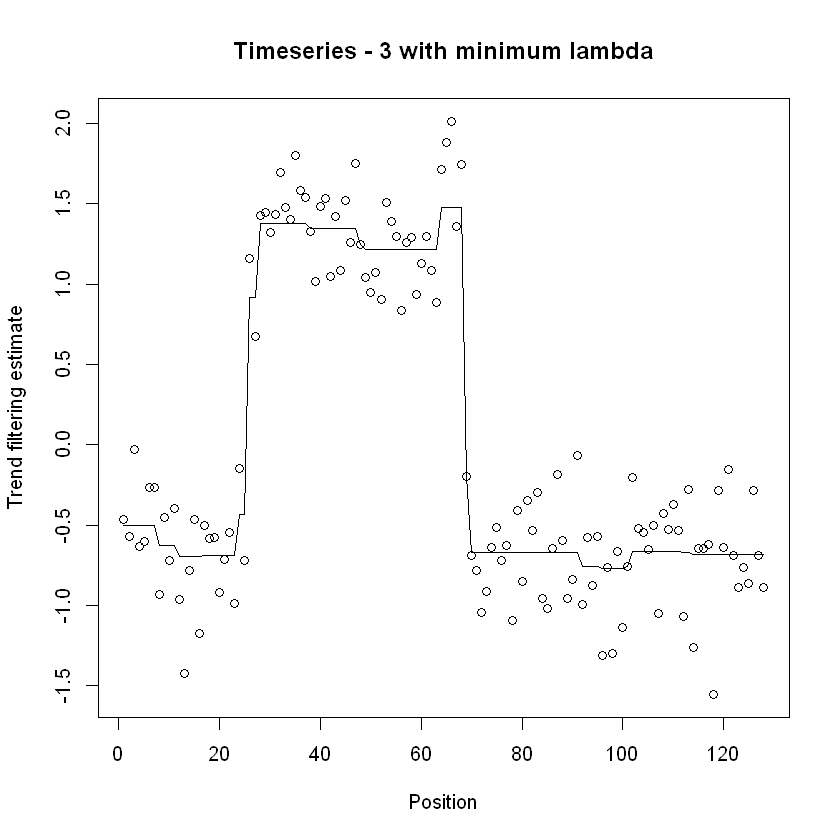

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 5"
[1] " min cv error: 0.1519257"
[1] "1se error: 4.05783902999985"


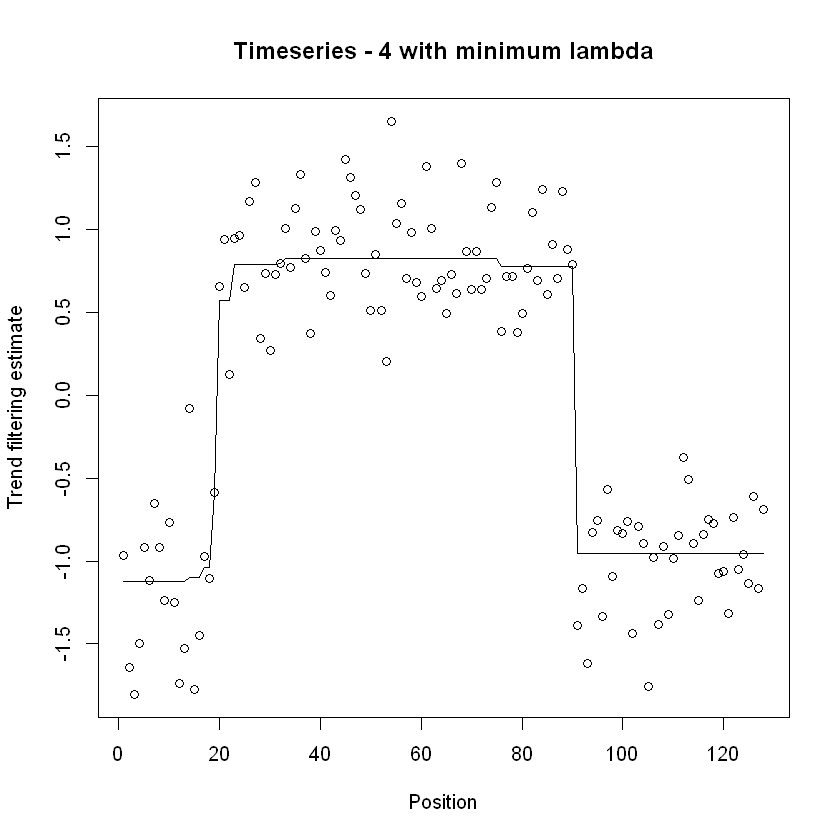

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 6"
[1] " min cv error: 0.869392846166667"
[1] "1se error: 3.05835323949998"


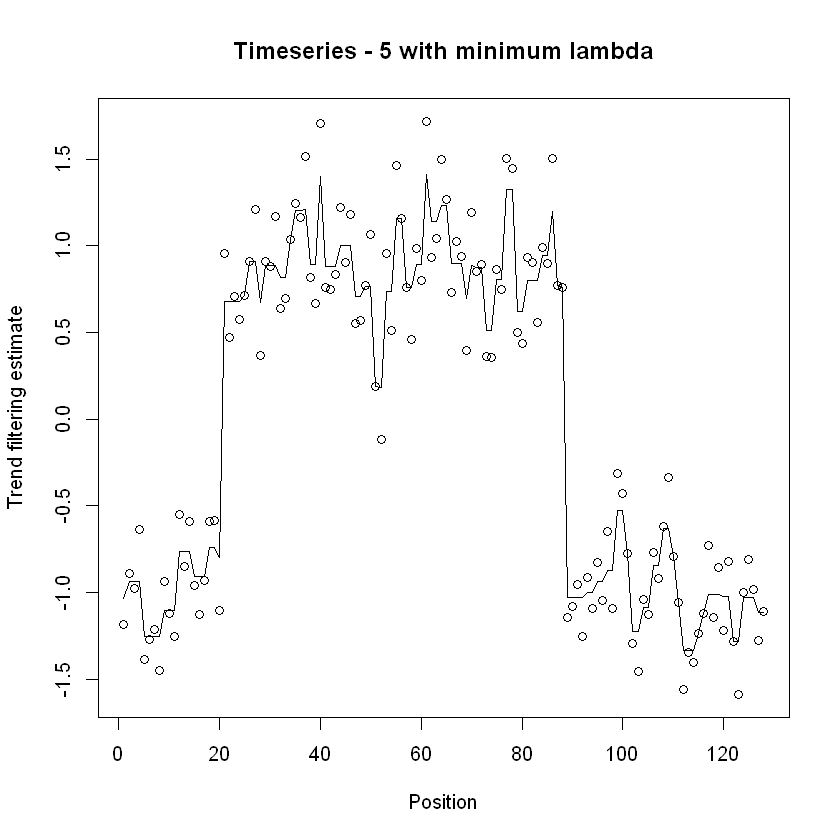

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 7"
[1] " min cv error: 0.970683237333312"
[1] "1se error: 2.89434150000001"


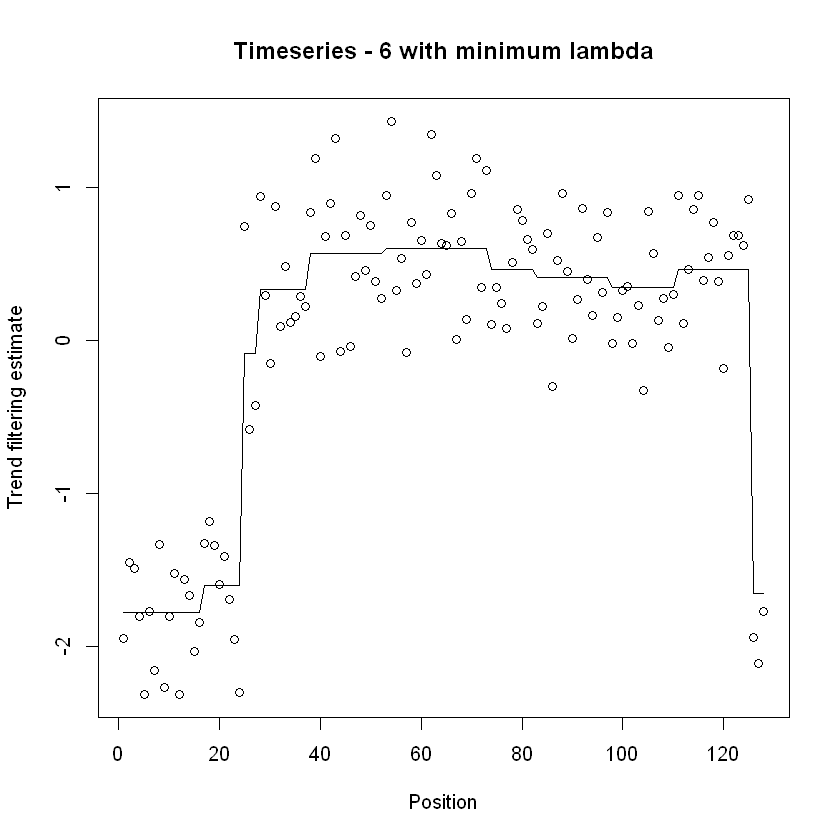

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 8"
[1] " min cv error: 0.774408884642857"
[1] "1se error: 4.53695957000001"


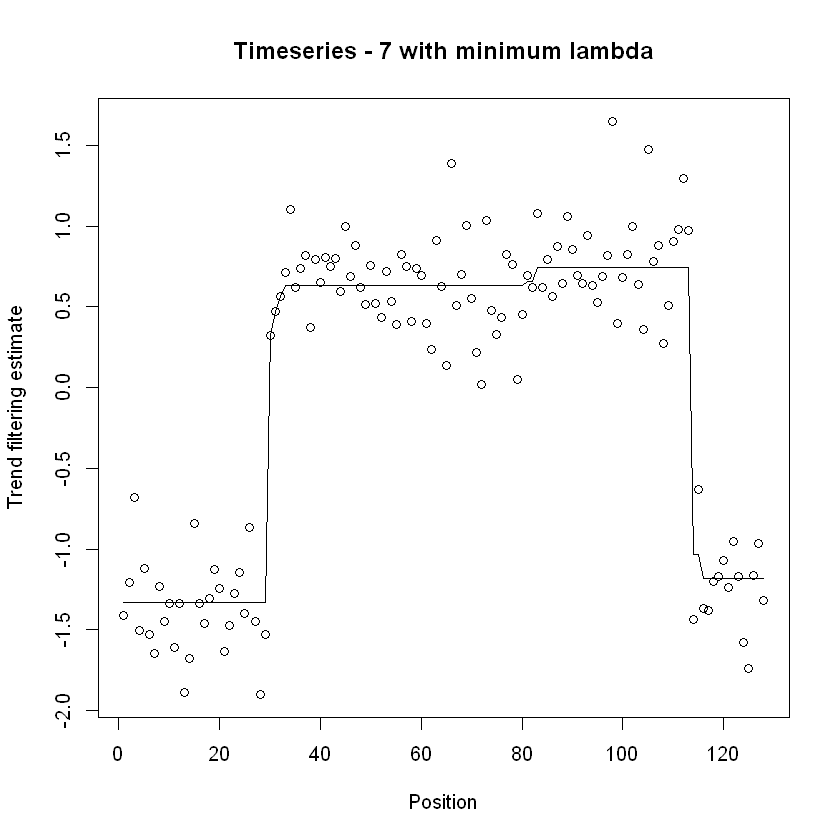

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 9"
[1] " min cv error: 1.20083447894738"
[1] "1se error: 3.92683693600004"


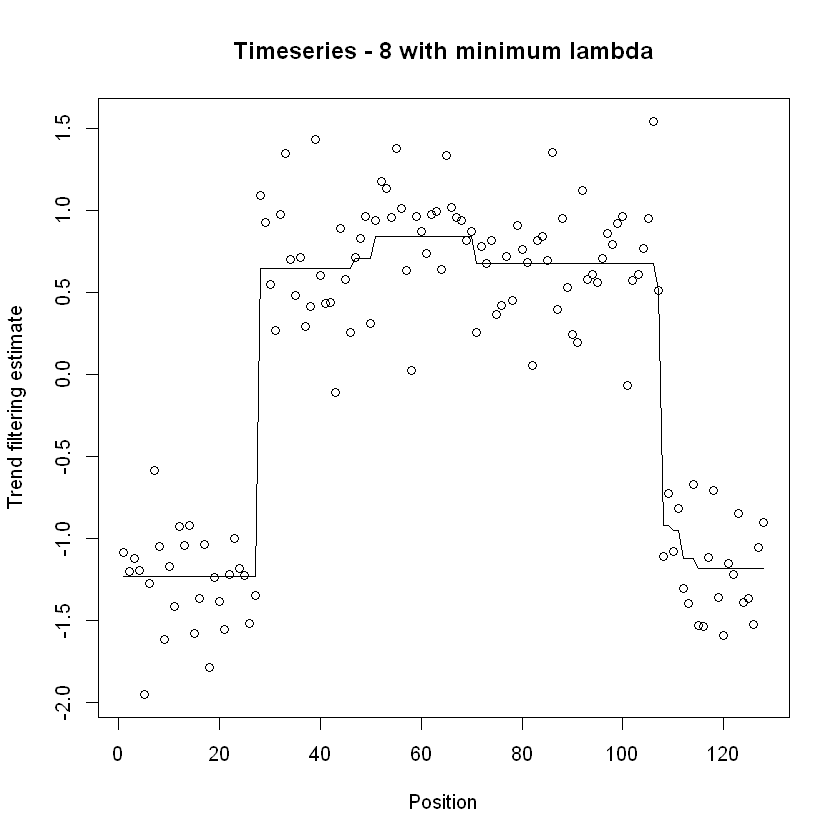

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 10"
[1] " min cv error: 0.544819881363635"
[1] "1se error: 3.9982433249999"


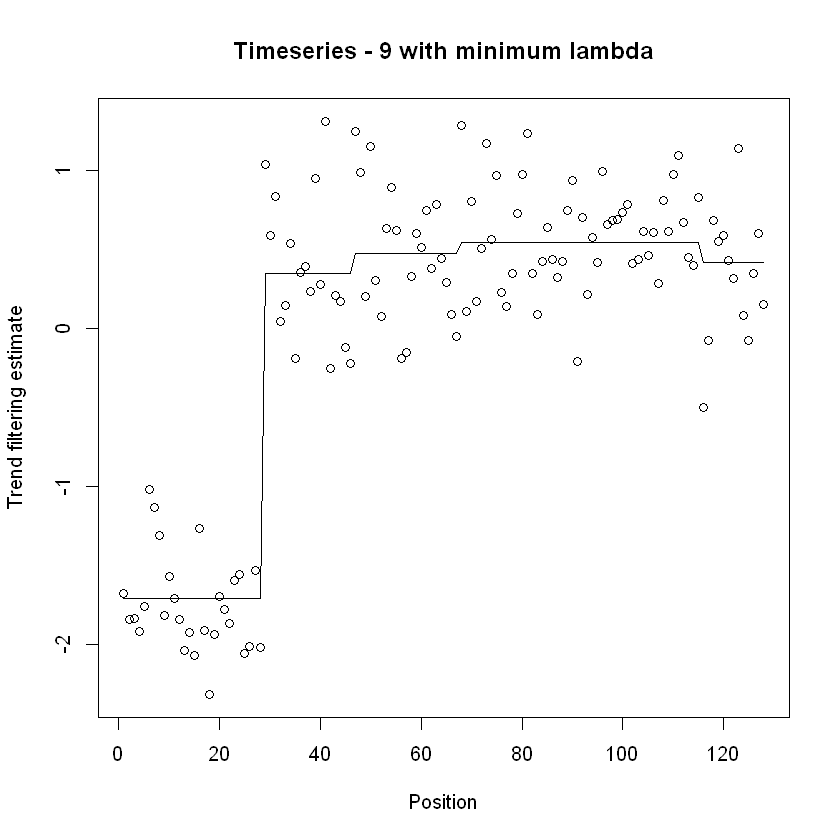

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 11"
[1] " min cv error: 1.02161963043478"
[1] "1se error: 3.32583449999999"


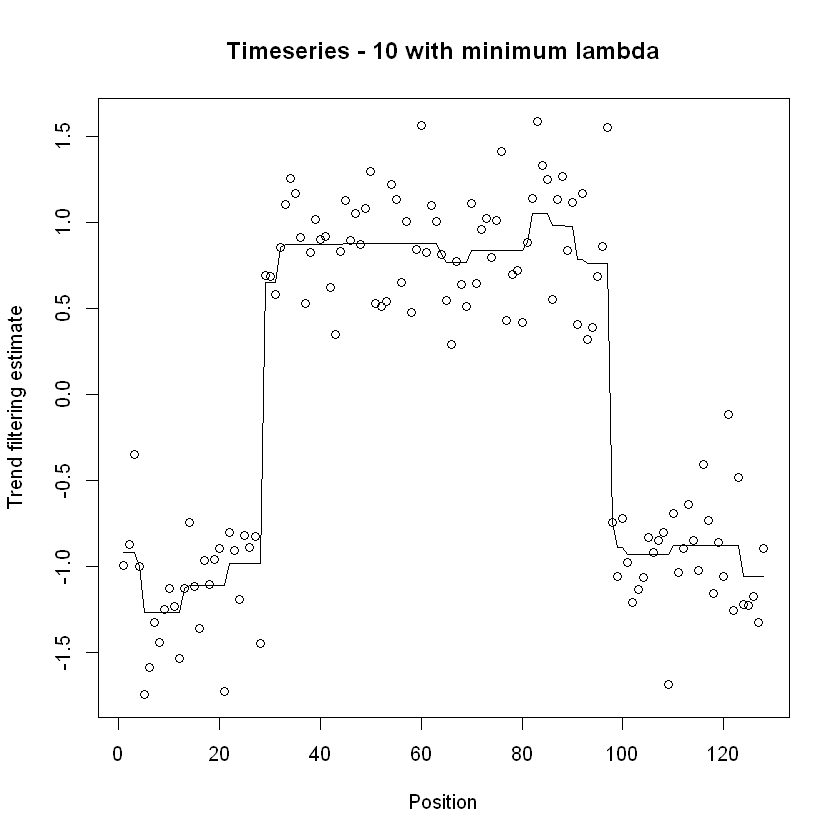

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 12"
[1] " min cv error: 1.01061940870588"
[1] "1se error: 2.87431018214808"


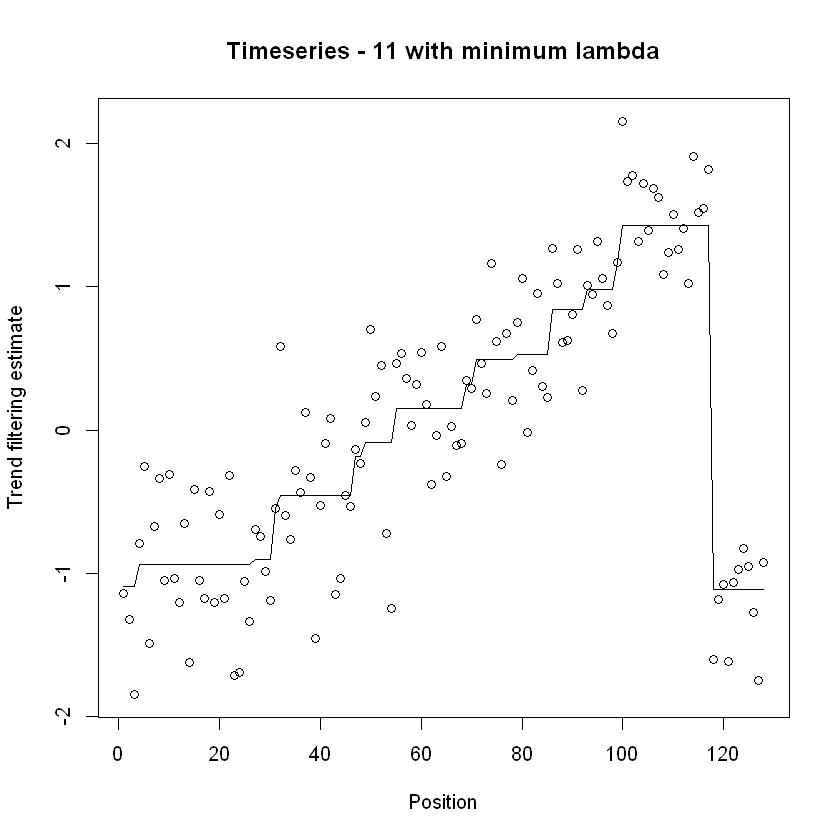

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 13"
[1] " min cv error: 1.01200804"
[1] "1se error: 3.03063357142858"


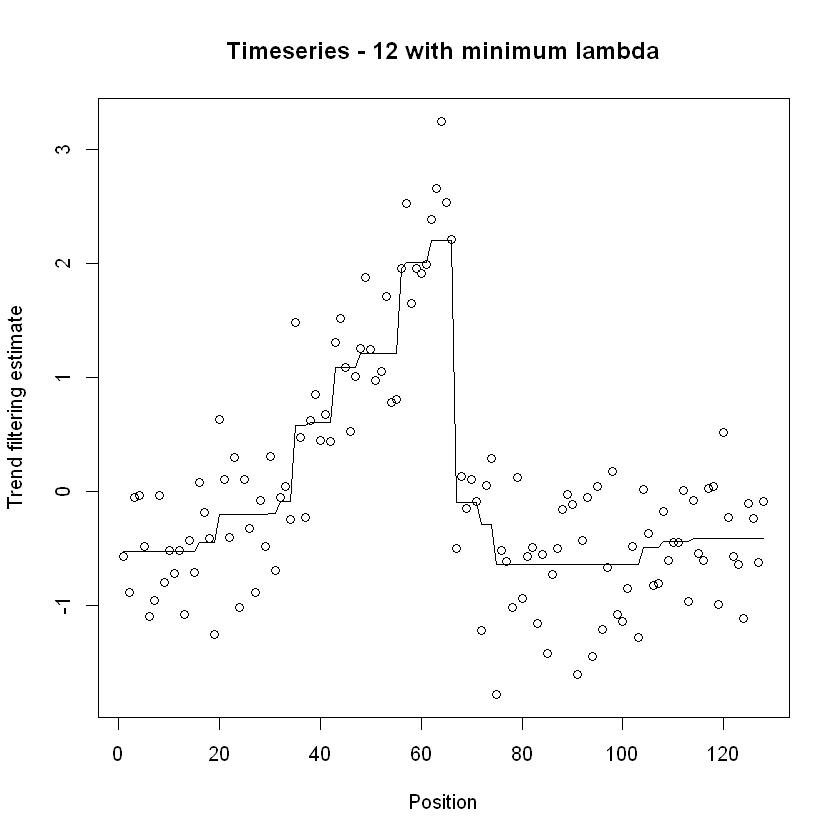

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 14"
[1] " min cv error: 0.987385322857142"
[1] "1se error: 4.25619744999999"


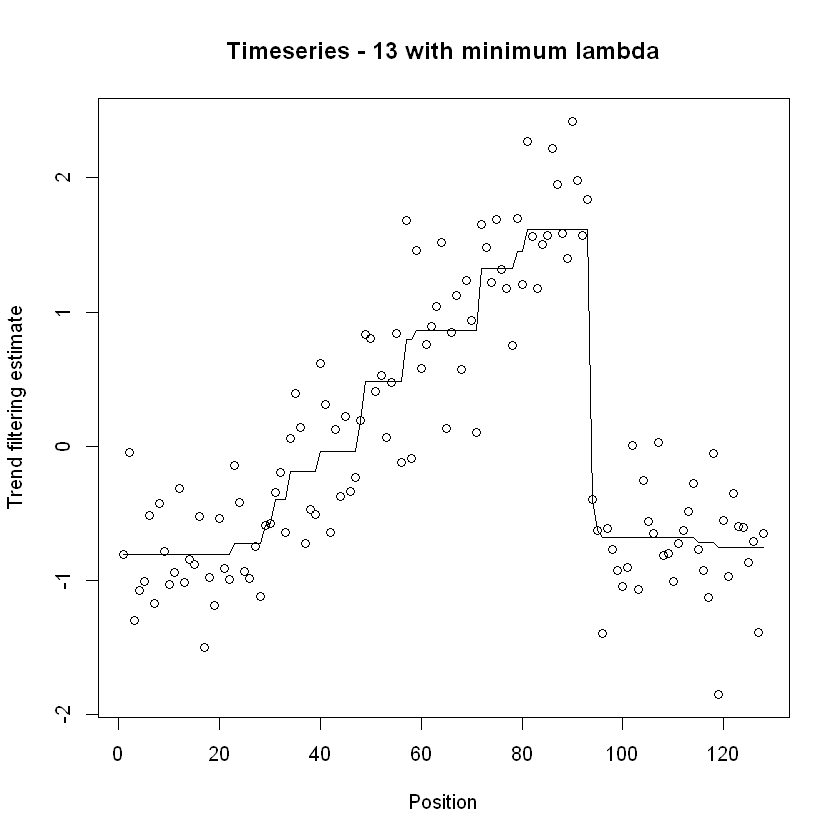

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 15"
[1] " min cv error: 0.836120653823529"
[1] "1se error: 3.17205142211764"


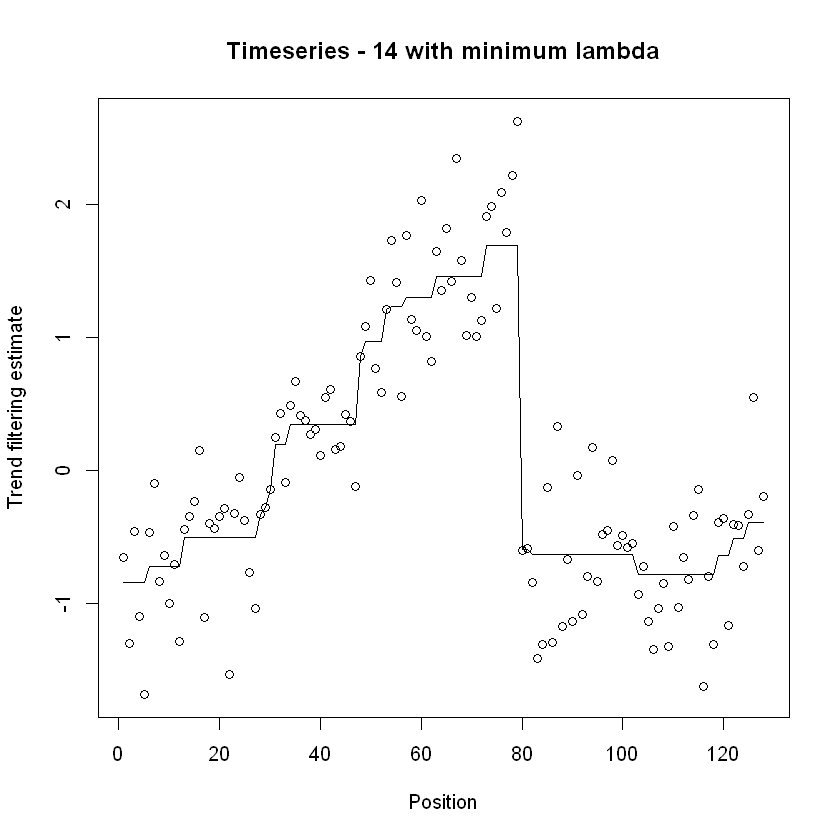

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 16"
[1] " min cv error: 0.814632915111111"
[1] "1se error: 3.31463047399993"


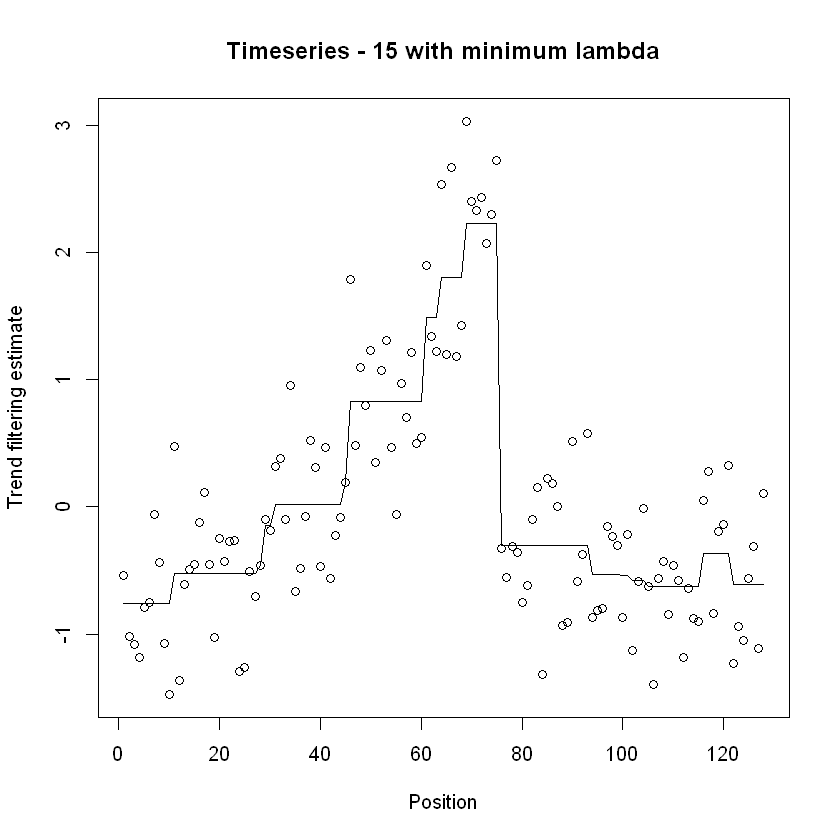

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 17"
[1] " min cv error: 1.04626645"
[1] "1se error: 3.889477535"


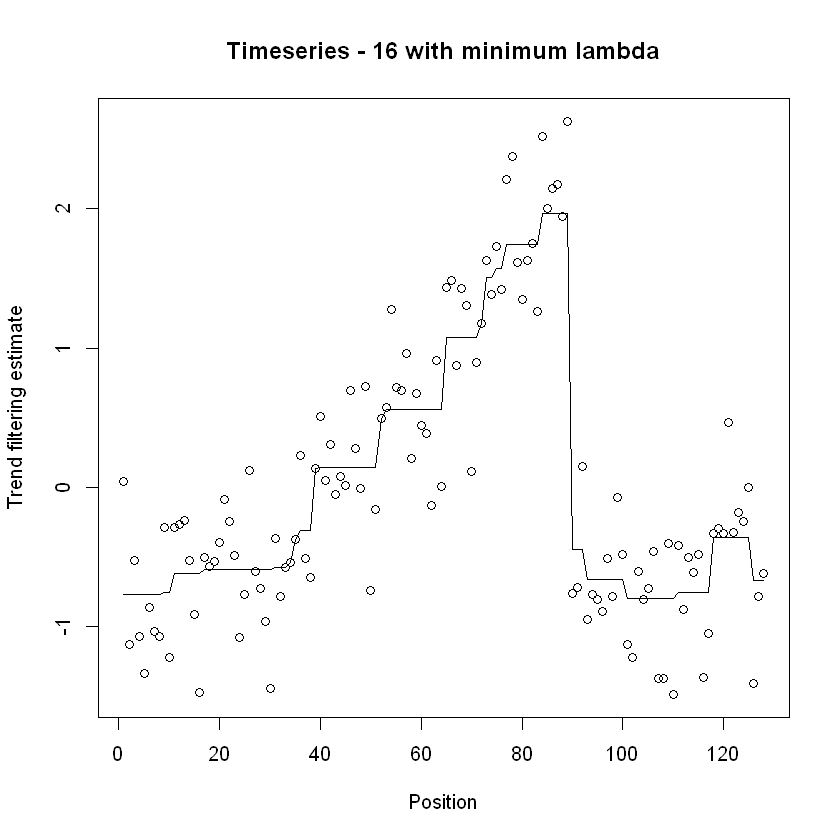

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 18"
[1] " min cv error: 0.550621856666666"
[1] "1se error: 1.72319757369231"


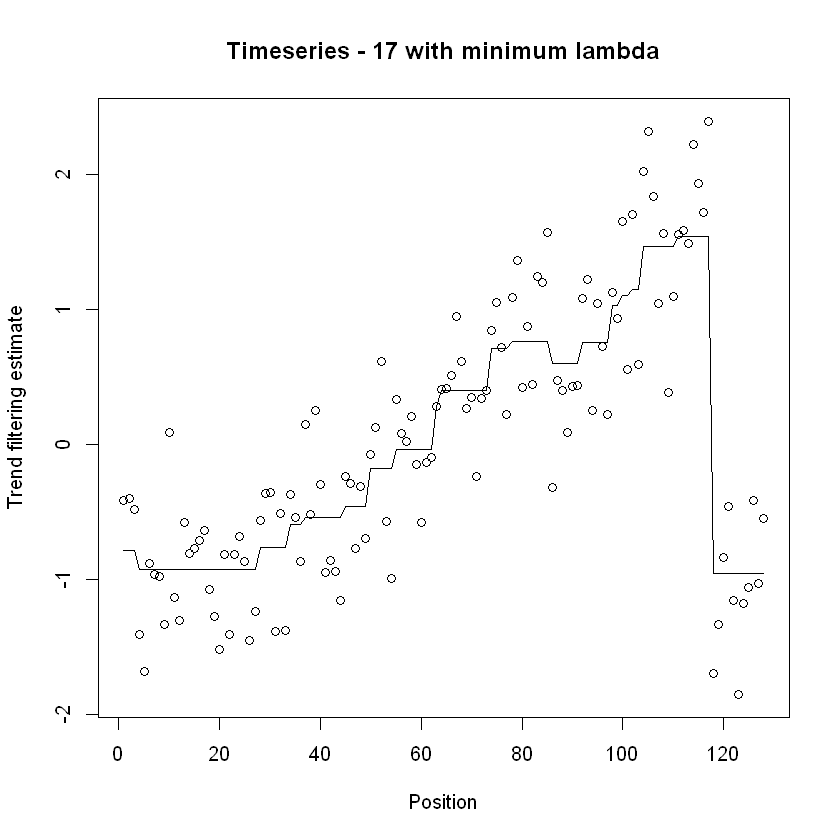

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 19"
[1] " min cv error: 1.11118076028572"
[1] "1se error: 2.811452406"


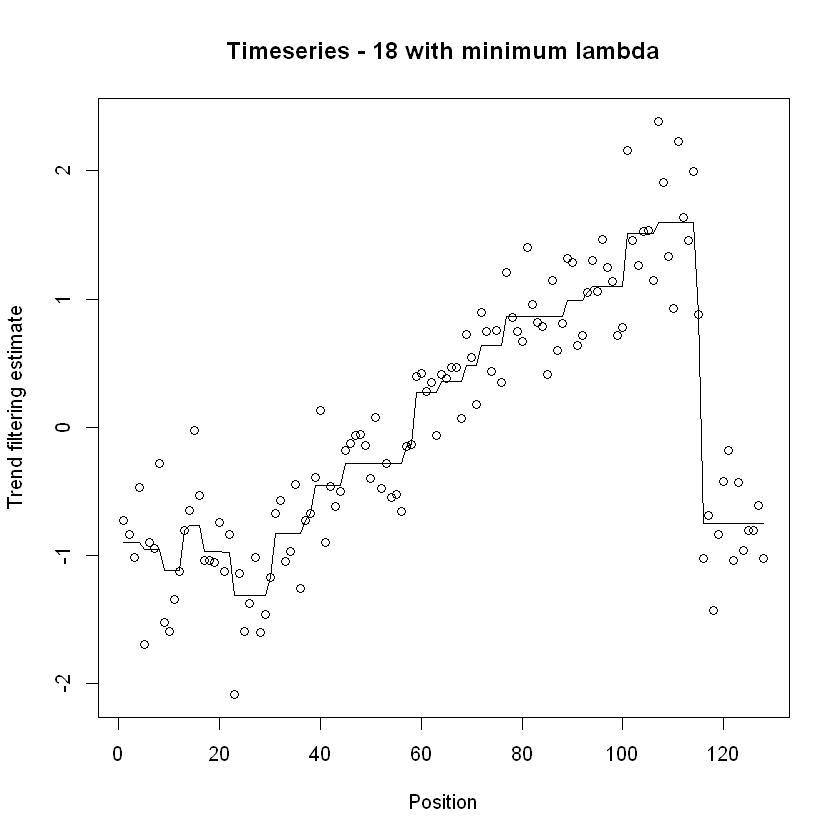

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 20"
[1] " min cv error: 0.95865362982353"
[1] "1se error: 5.00587031619992"


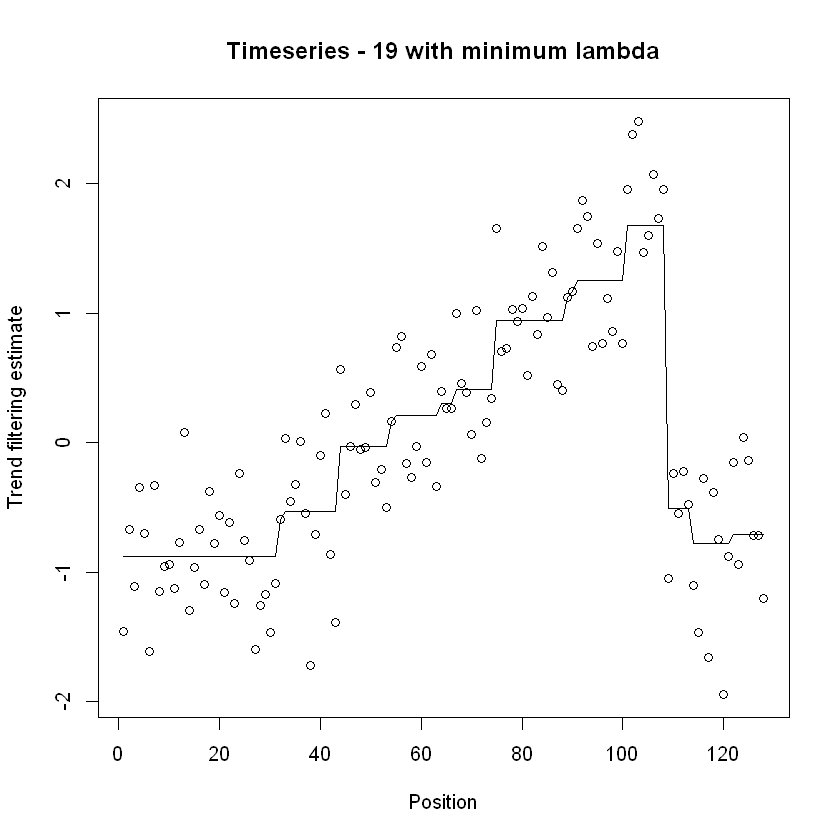

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 21"
[1] " min cv error: 0.588207126777778"
[1] "1se error: 1.53021594555554"


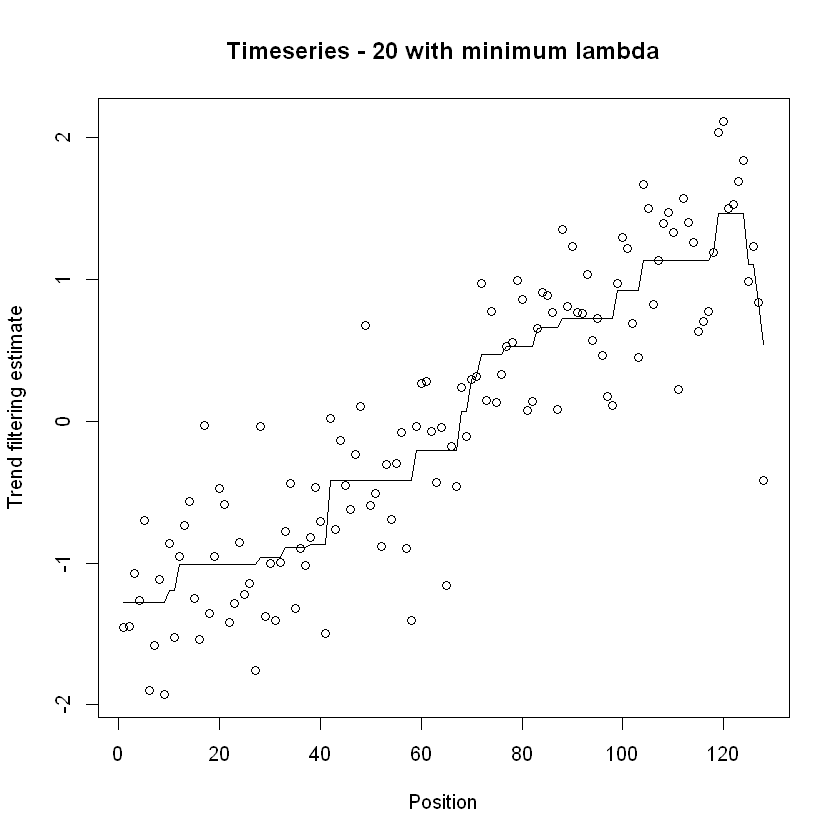

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 22"
[1] " min cv error: 1.08177736333333"
[1] "1se error: 3.56322471733341"


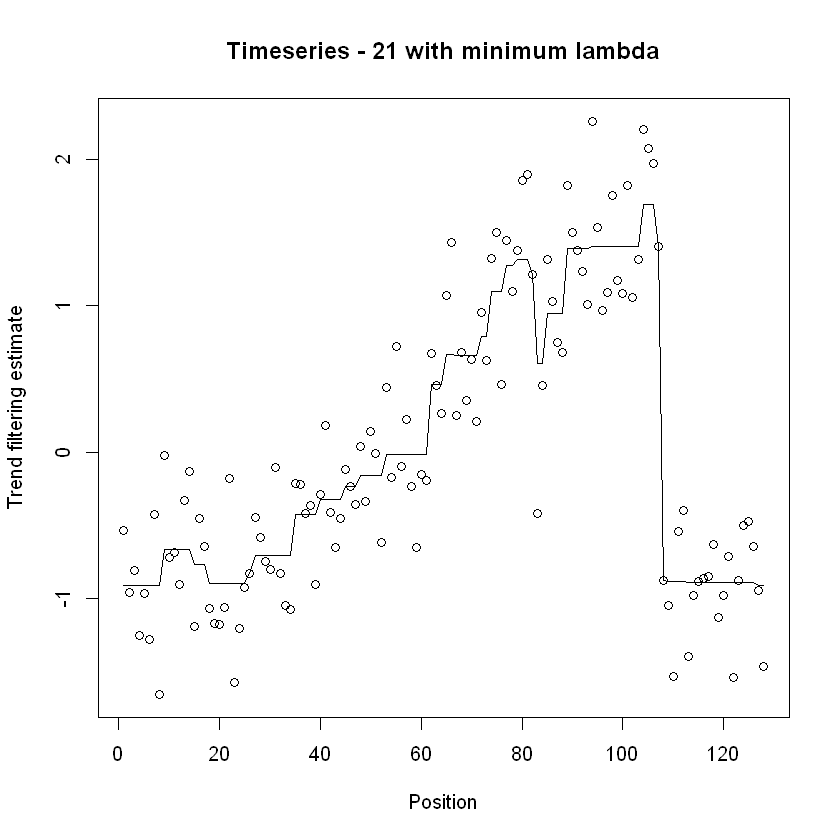

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 23"
[1] " min cv error: 1.30885129048"
[1] "1se error: 2.79903382499999"


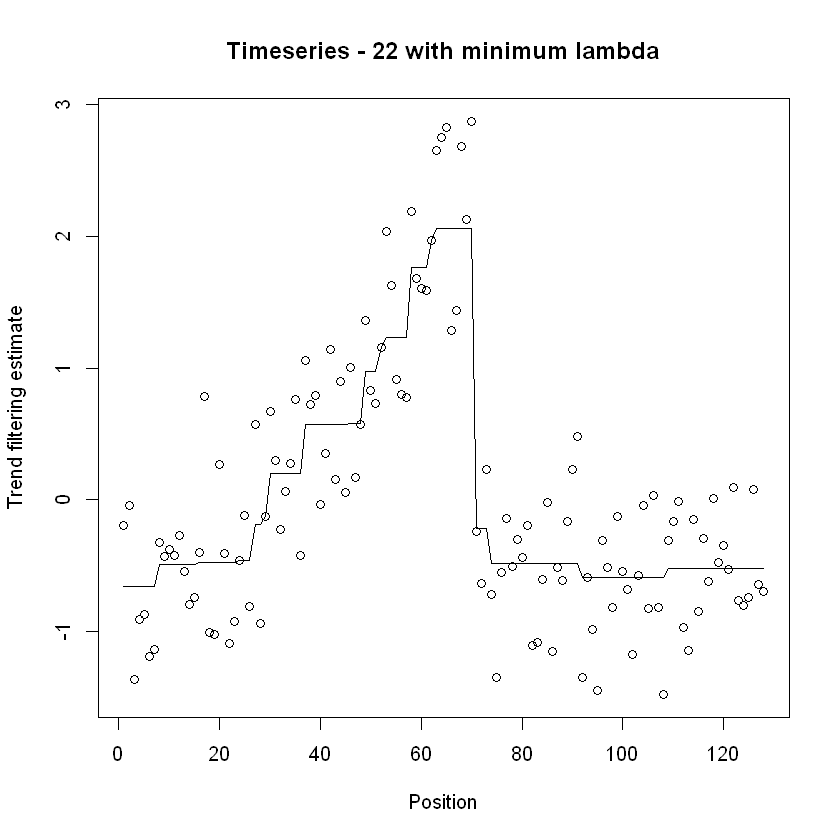

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 24"
[1] " min cv error: 1.19303806625"
[1] "1se error: 2.58996471857142"


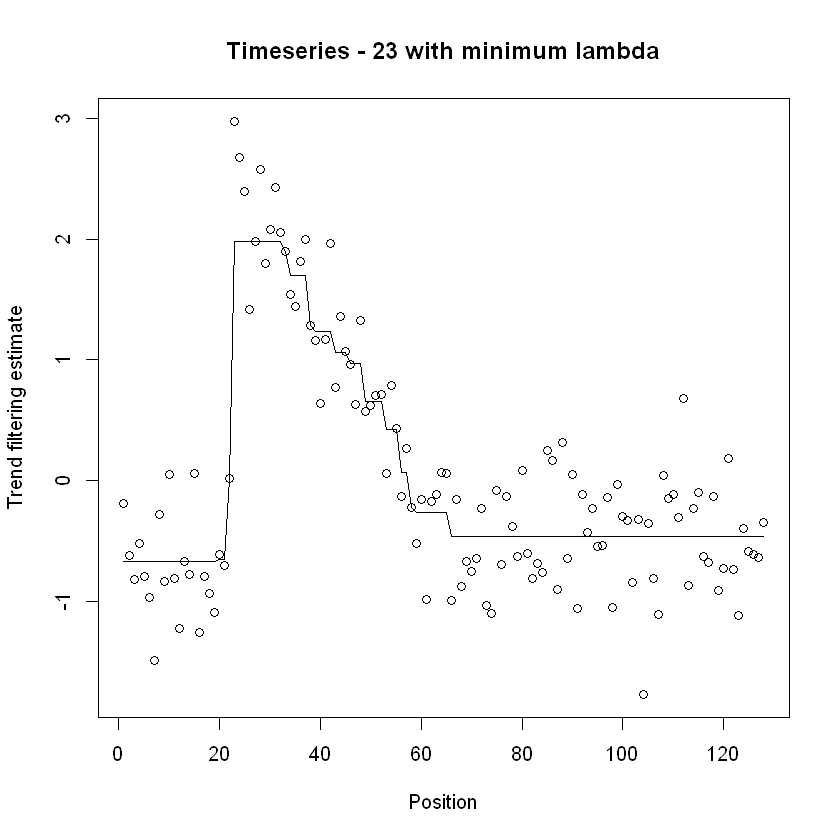

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 25"
[1] " min cv error: 0.976470802857144"
[1] "1se error: 4.10882562999999"


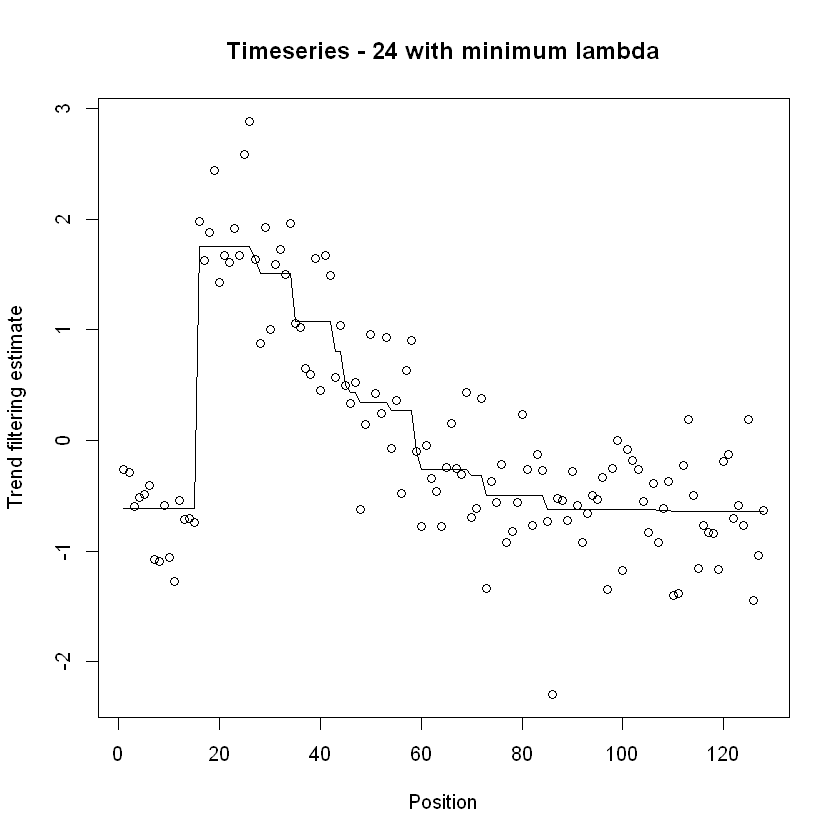

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 26"
[1] " min cv error: 0.362026489571428"
[1] "1se error: 1.97882005255881"


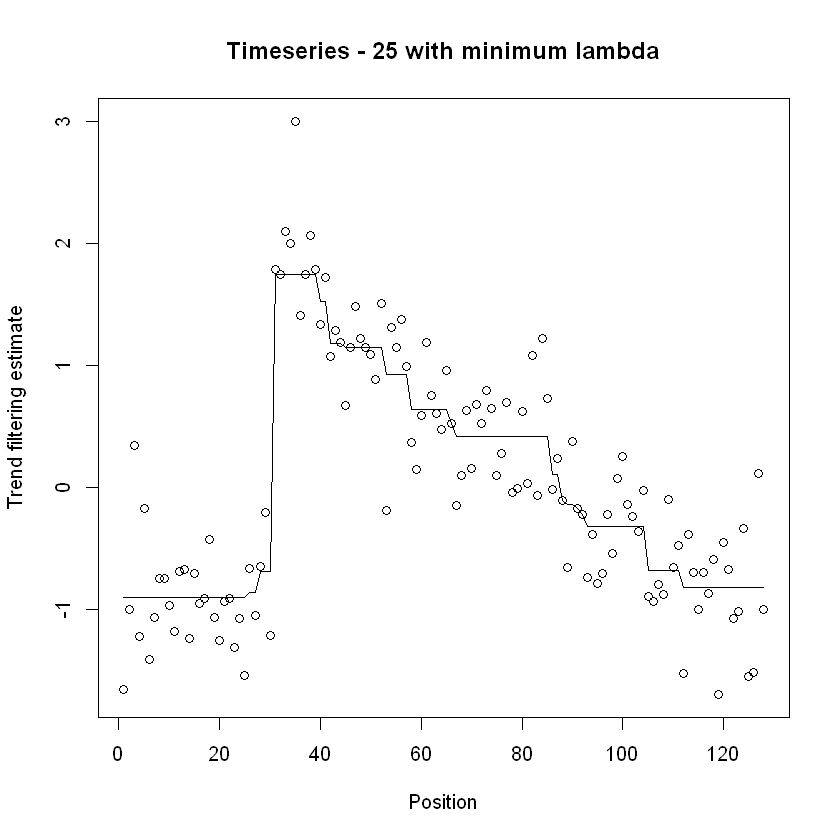

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 27"
[1] " min cv error: 1.10884689999999"
[1] "1se error: 3.22132577499999"


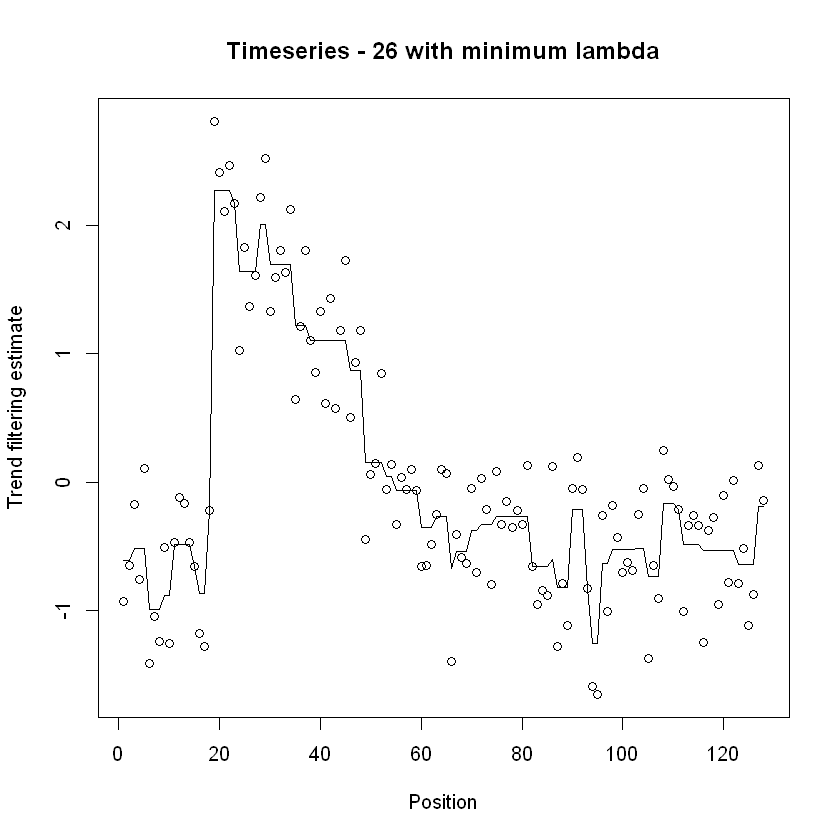

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 28"
[1] " min cv error: 0.825460994999998"
[1] "1se error: 3.10094448"


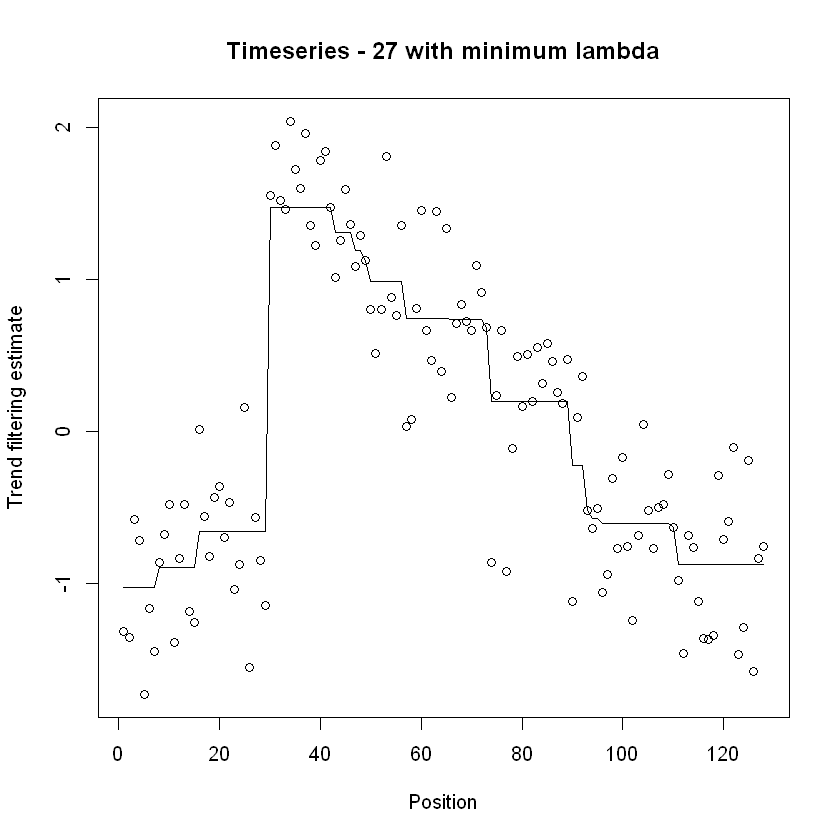

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 29"
[1] " min cv error: 1.371785149"
[1] "1se error: 4.72404246249998"


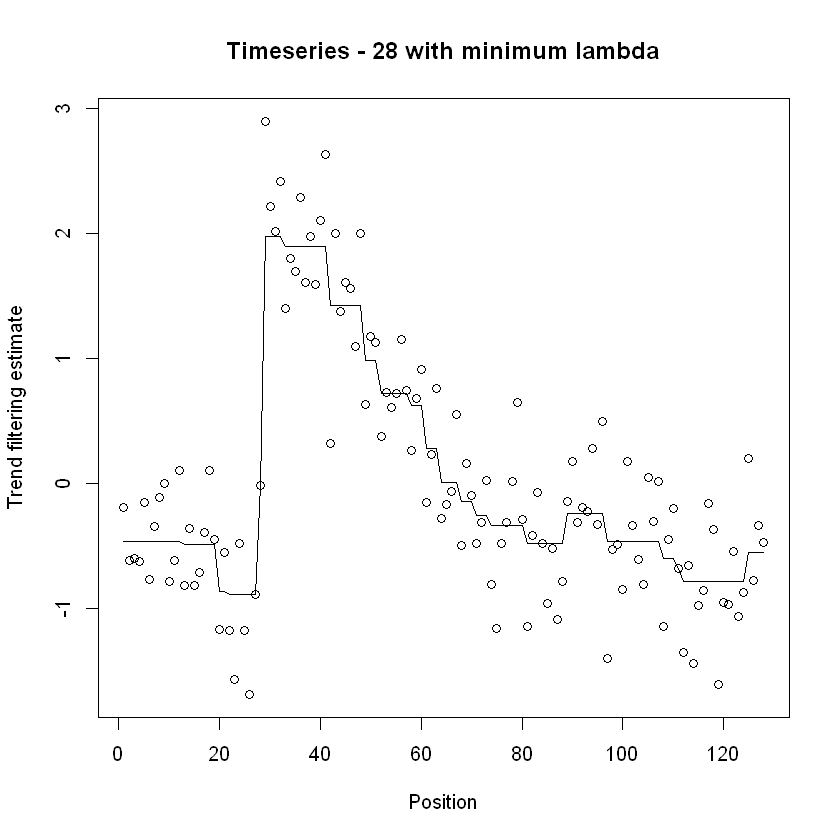

Fold 1 ... Fold 2 ... Fold 3 ... Fold 4 ... Fold 5 ... Fold 6 ... Fold 7 ... Fold 8 ... Fold 9 ... Fold 10 ... 
[1] "Timeseries - 30"
[1] " min cv error: 1.26585695"
[1] "1se error: 2.54716689060009"


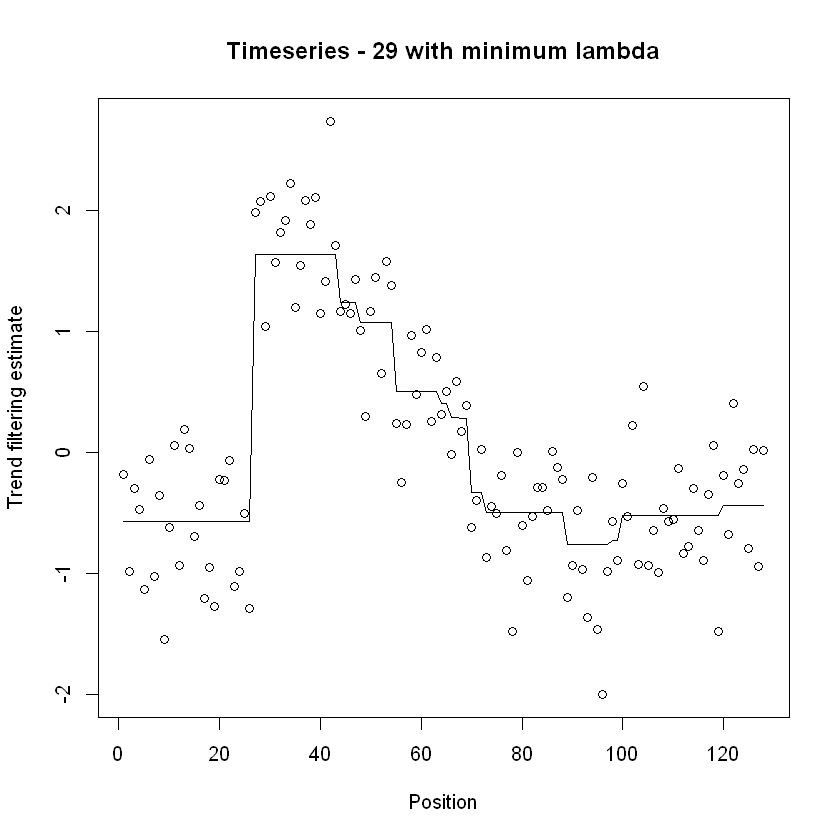

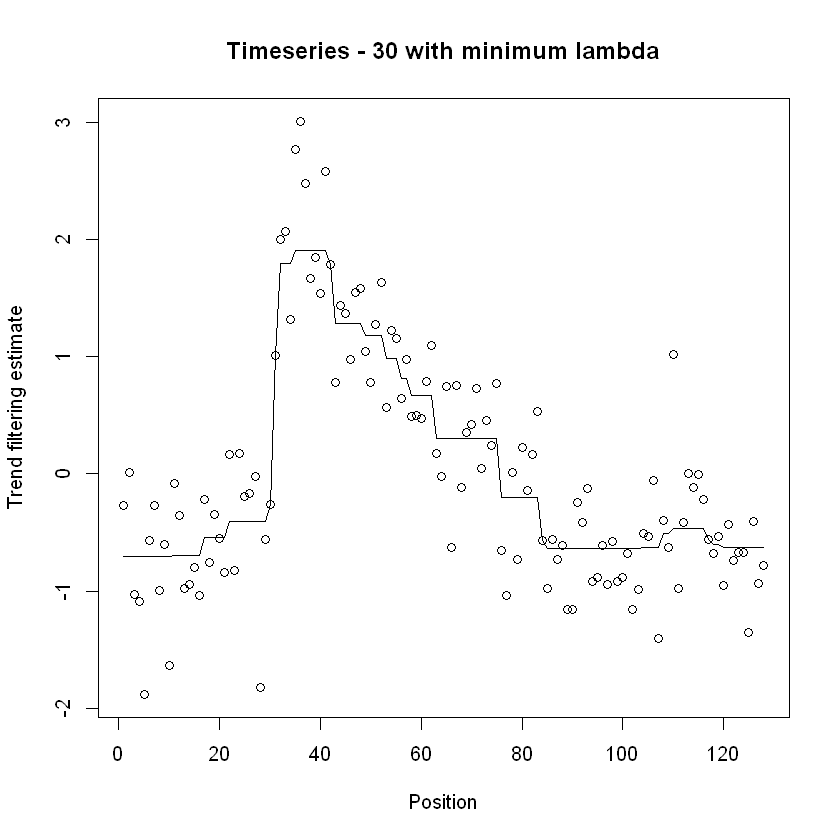

In [13]:
lasso_preds <- vector("list",30)

flasso = function(id,dt){
  dt <- as.matrix(dt[,value])
  result = trendfilter(dt, ord=0)
  cross_val = cv.trendfilter(result, k = 10)
  print(paste0("Timeseries - ", id) )
  print(paste0(" min cv error: ", cross_val$lambda.min))
  print(paste0("1se error: ", cross_val$lambda.1se))
 plot(result, lambda=cross_val$lambda.min, main=paste0("Timeseries - ",id," with minimum lambda"))  
  return (predict.genlasso(result, cross_val$lambda.min))
}

for (i in 1:30){
  pred = flasso(i, x[[i]])
  lasso_preds[[i]] = as.data.table(t(pred$fit))
} 

lasso_preds = rbindlist(lasso_preds)

As it was advised in homework document, k-fold cross validation with k value of 10 is used. Predictions are stored in a list for further performance analysis.

# Regression Trees

In [14]:
trControl = trainControl(method='repeatedcv',number=10,repeats=5)
tree_depths <- vector('list',10)

predictions<- vector('list',30)

tree_fit = function(dt, depth){
  control = rpart.control(minsplit=20,minbucket=10,maxdepth=depth)
  return (train(value~time, data=dt,method='rpart',metric='RMSE',
               control= control, trControl = trControl, tuneGrid=data.frame(cp = 0) ))
}

depths = vector('list',10)
optimum_depths = vector('list', 30)

for(id in 1:30){
  for(i in 1:10){
    tree_depths[[i]] = tree_fit(x[[id]],i)$result
  }
    print(paste0('Depth metrics(RMSE) ',id))
    print(tree_depths)
  optimum_depth = which.min(rbindlist(tree_depths)$RMSE)
  optimum_depths[id] = optimum_depth
  print(paste0('Optimum depth for ', id,'. series:', optimum_depth))
  
}

predictions = vector('list',30)

for(id in 1:30){
  predictions[[id]] = predict(tree_fit(x[[id]],optimum_depths[id]))
}

prediction_combined = rbindlist(lapply(predictions, function(x) as.data.table(t(x))))


[1] "Depth metrics(RMSE) 1"
[[1]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.8065222 0.3815937 0.6701661 0.1574368  0.2323446 0.1413477

[[2]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3731151 0.8491464 0.2634148 0.1533776   0.127021 0.08276678

[[3]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3886151 0.8437501 0.2756069 0.1511615  0.1197362 0.07654041

[[4]]
  cp      RMSE  Rsquared       MAE   RMSESD RsquaredSD      MAESD
1  0 0.3602879 0.8639523 0.2719768 0.167328  0.1359181 0.09322629

[[5]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.3745285 0.8541871 0.2763872 0.1539996  0.1299031 0.0777665

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.3829545 0.8454801 0.2773928 0.1621462  0.1412318 0.0782984

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3801413 0.8456025 0.2783544 0.1735718  0.1631011 0.084

[1] "Depth metrics(RMSE) 7"
[[1]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.6781105 0.5341081 0.4733289 0.1522021  0.2089084 0.1046504

[[2]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3708113 0.8505409 0.2529645 0.1679745  0.1404344 0.07264388

[[3]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.3604262 0.8591867 0.2545273 0.1714683  0.1488503 0.0850717

[[4]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3772397 0.8469189 0.2609462 0.1638311  0.1358871 0.07771723

[[5]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3716991 0.8532427 0.2589762 0.1659441  0.1315519 0.07671988

[[6]]
  cp    RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.35858 0.8616996 0.2542512 0.1627257  0.1293524 0.07968526

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3690401 0.8551679 0.2577993 0.1534743  0.1274494 0.070

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "Depth metrics(RMSE) 8"
[[1]]
  cp      RMSE Rsquared       MAE   RMSESD RsquaredSD     MAESD
1  0 0.7604966 0.444099 0.5855641 0.146189  0.2059107 0.1249892

[[2]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3928237 0.8375995 0.2910324 0.1376883  0.1374279 0.07211908

[[3]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3842047 0.8477072 0.2912176 0.1202569  0.1132218 0.06442901

[[4]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3740115 0.8622565 0.2776517 0.1072324 0.08338723 0.05713559

[[5]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3934746 0.8470914 0.2889228 0.1312412  0.1089551 0.06814037

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3963307 0.8375643 0.2937024 0.1432426  0.1329342 0.07449156

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3984615 0.8350925 0.2934304 0.1543814  0.1376289 0.0

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "Depth metrics(RMSE) 10"
[[1]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD    MAESD
1  0 0.8090881 0.3700832 0.6728492 0.1139748  0.1593813 0.113243

[[2]]
  cp      RMSE  Rsquared       MAE   RMSESD RsquaredSD      MAESD
1  0 0.3902183 0.8364715 0.2849169 0.191947  0.1648871 0.09485528

[[3]]
  cp     RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.401442 0.8308702 0.2901814 0.1821374  0.1540321 0.08340859

[[4]]
  cp      RMSE  Rsquared       MAE   RMSESD RsquaredSD      MAESD
1  0 0.3938006 0.8327315 0.2865842 0.194595  0.1676025 0.09851848

[[5]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.3837021 0.8424292 0.2856853 0.1654677  0.1486437 0.08719452

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.4109008 0.8257309 0.2950293 0.1788707  0.1471144 0.08578172

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.4047864 0.8294174 0.2984894 0.1812596  0.1505587 0.0919

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "Depth metrics(RMSE) 13"
[[1]]
  cp      RMSE  Rsquared       MAE     RMSESD RsquaredSD      MAESD
1  0 0.9540444 0.1123234 0.8017488 0.08775044 0.06697472 0.07316433

[[2]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.6218427 0.6365489 0.4773747 0.1478912  0.1462982 0.1061885

[[3]]
  cp      RMSE Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.5157341 0.753998 0.3975734 0.1361458  0.1216866 0.08840929

[[4]]
  cp     RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.496457 0.7622214 0.3884754 0.1529644  0.1607815 0.09446681

[[5]]
  cp     RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.484387 0.7757118 0.3812003 0.1411017  0.1542796 0.0930939

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.4927967 0.7712888 0.3841165 0.1567586  0.1660362 0.1036463

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.4860467 0.7698556 0.3821315 0.1507659  0.1552704 0.10317

[1] "Depth metrics(RMSE) 19"
[[1]]
  cp    RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.82769 0.3394081 0.6639498 0.1548267  0.1847828 0.1290337

[[2]]
  cp      RMSE  Rsquared       MAE   RMSESD RsquaredSD      MAESD
1  0 0.6732639 0.5737536 0.5281579 0.131848  0.1407005 0.09881503

[[3]]
  cp      RMSE Rsquared      MAE    RMSESD RsquaredSD     MAESD
1  0 0.5670793 0.699001 0.456453 0.1502842  0.1519833 0.1051504

[[4]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.5589242 0.7047978 0.4425805 0.1523976  0.1700854 0.1029325

[[5]]
  cp      RMSE Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.5515576 0.712653 0.4382421 0.1596781   0.180501 0.1103914

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.5437146 0.7167805 0.4365371 0.1481484  0.1675891 0.1014306

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.5526625 0.7105518 0.4352547 0.1539906  0.1495129 0.1027389

[[8]]
  

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

[1] "Depth metrics(RMSE) 25"
[[1]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.8586949 0.2803541 0.6967014 0.1561317  0.1466242 0.1310295

[[2]]
  cp    RMSE  Rsquared       MAE   RMSESD RsquaredSD      MAESD
1  0 0.59711 0.6648835 0.4736013 0.133013  0.1396696 0.09254057

[[3]]
  cp      RMSE  Rsquared      MAE  RMSESD RsquaredSD    MAESD
1  0 0.5422996 0.7267965 0.417737 0.17867  0.1752697 0.114811

[[4]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.5109536 0.7478708 0.3855522 0.1810683  0.1705888 0.1043934

[[5]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.5071813 0.7549075 0.3836112 0.1817383  0.1702924 0.09963925

[[6]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD      MAESD
1  0 0.5102954 0.7521893 0.3838626 0.1639508  0.1465828 0.08657889

[[7]]
  cp      RMSE  Rsquared       MAE    RMSESD RsquaredSD     MAESD
1  0 0.4958357 0.7635604 0.3779846 0.1793025  0.1708088 0.1045705

[[8]]


RMSE metric is used for searching the best depth. Max depth is set to 10. After finding the best depth for every time series, final models are predicted.

# Performance Comparison (MSE)

    index      lasso       tree
 1:     1 0.07582339 0.07603541
 2:     2 0.08875735 0.10458403
 3:     3 0.07374431 0.09406769
 4:     4 0.10718741 0.10688693
 5:     5 0.02709995 0.10341226
 6:     6 0.12970153 0.23408377
 7:     7 0.07490678 0.07108740
 8:     8 0.09452207 0.09203313
 9:     9 0.12802044 0.11637371
10:    10 0.07663486 0.08999273
11:    11 0.15307345 0.15629863
12:    12 0.19097581 0.20689583
13:    13 0.14116961 0.14170456
14:    14 0.15679461 0.16210913
15:    15 0.19599474 0.21550639
16:    16 0.13860763 0.15777565
17:    17 0.17454071 0.19073604
18:    18 0.08607714 0.11243980
19:    19 0.18214806 0.18675989
20:    20 0.15753799 0.18743916
21:    21 0.12197601 0.16013706
22:    22 0.20101071 0.21681927
23:    23 0.15784563 0.16789136
24:    24 0.18614178 0.18536768
25:    25 0.15175146 0.15556872
26:    26 0.10224335 0.20529820
27:    27 0.15592310 0.15830521
28:    28 0.15249074 0.19635142
29:    29 0.19082549 0.19779294
30:    30 0.18342755 0.18730703
    inde

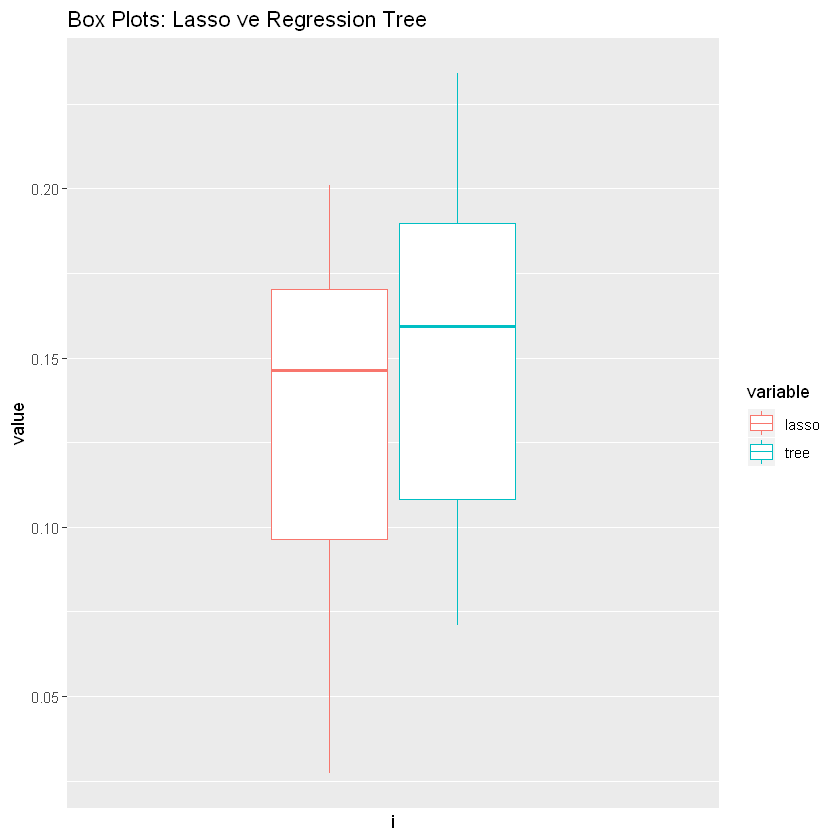

In [15]:
real_vals = train_data[,-1][,-129]

get_metric = function(dt,id){
  return (sum(mse(as.numeric(real_vals[id]),as.numeric(dt[id]))))
}
metrics_combined = rbindlist(lapply(1:30,function(index) data.frame(index,lasso = get_metric(lasso_preds,index),tree = get_metric(prediction_combined,index))))
print(metrics_combined)
long_metrics = melt(metrics_combined,id.vars = 'index',measure_vars = c('lasso','tree'))
print(long_metrics)
ggplot(long_metrics, aes(x=i, y=value, color = variable))+
geom_boxplot()+
  ggtitle("Box Plots: Lasso ve Regression Tree") +
  scale_fill_discrete(labels = c("Fused Lasso", "Regression Tree"))+
  scale_x_discrete(labels= c("lasso"="Fused Lasso","tree"="Regression Tree"))



As shown in the boxplot figure above lasso performs slightly better then regression trees. Variance is generally smaller in lasso.

# 1-NN Classifier

In [17]:
classes = as.numeric(unlist(train_data[,1]))

number = 5000

euc_dist_raw = as.matrix(dist(train_data[,2:ncol(train_data)]))

diag(euc_dist_raw) = number

neighborhood_raw=apply(euc_dist_raw,1,order)

predicted_raw = classes[neighborhood_raw[1,]]

table(classes,predicted_raw)

print(paste0("Raw Dataset accuracy: ", sum(classes==predicted_raw)/length(predicted_raw)))

       predicted_raw
classes  1  2  3
      1 10  0  0
      2  0 11  1
      3  0  0  8

[1] "The accuracy of Raw Dataset: 0.966666666666667"


In [20]:

euc_dist_lasso = as.matrix(dist(lasso_preds))

diag(euc_dist_lasso) = number

neighborhood_lasso = apply(euc_dist_lasso,1,order)

predicted_lasso = classes[neighborhood_lasso[1,]]

table(classes,predicted_lasso)

print(paste0("Lasso accuracy: ", sum(classes==predicted_lasso)/length(predicted_lasso)))

       predicted_lasso
classes  1  2  3
      1  8  0  2
      2  0 12  0
      3  0  0  8

[1] "The accuracy of Raw Dataset: 0.933333333333333"


In [21]:
euc_dist_tree = as.matrix(dist(prediction_combined))

diag(euc_dist_tree) = number

neighborhood_tree = apply(euc_dist_tree,1,order)

predicted_tree = classes[neighborhood_tree[1,]]

table(classes,predicted_tree)

print(paste0("Tree accuracy: ", sum(classes==predicted_tree)/length(predicted_tree)))

       predicted_tree
classes  1  2  3
      1  8  0  2
      2  1 11  0
      3  1  0  7

[1] "Tree accuracy: 0.866666666666667"
